# numpy array 简介

In [ ]:
import numpy as np
arr = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[13,14,1], [1, 2,3]]])
arr

Check Number of Dimensions?

In [ ]:
print(arr.ndim) 

In [ ]:
print(arr.shape)

In [4]:
print(arr[0])

[[1 2 3]
 [4 5 6]]


In [5]:
print(arr[0,1])

[4 5 6]


In [6]:
print(arr[0, 1, 1]) 

5


In [7]:
a_1d = np.arange(3)
print(a_1d)
# [0 1 2]

[0 1 2]


In [8]:
a_2d = np.arange(12).reshape((3, 4))
print(a_2d)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [9]:
a_3d = np.arange(24).reshape((2, 3, 4))
print(a_3d)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [10]:
print(a_3d.shape)

(2, 3, 4)


# Image Data
## Basics

Each pixel of RGB image is encoded with 3 bytes. Each byte (8 bits) has a level from 0-255, i.e. 2^8. 彩色图片 (RGB) 是 3x8 = 24 bits；　如果在加透明度信息 (alpha), RGBA就变成了4x8 =32 bits;  黑白相片只有灰度是 1x8 = 8 bits。

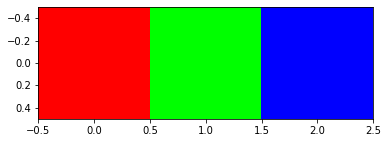

In [11]:
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt
pixel_rgb = [[[255, 0, 0, 255],
      [0, 255,  0, 255],
      [0, 0, 255, 255],
      ]]
plt.imshow(pixel_rgb)
# remove axis
#fig = plt.imshow(pixel_rgb)
# plt.axis('off')
# fig.axes.get_xaxis().set_visible(False)
# fig.axes.get_yaxis().set_visible(False)


## array to image 

each matrix block is a row of data, and each element within that is the pixel values in RGB-A (Red Green Blue Alpha).

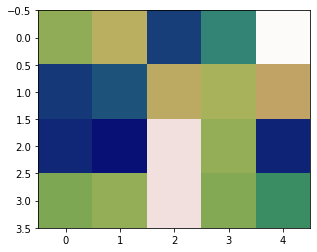

In [12]:
np.random.seed(2021) 
myarray = np.random.rand(4,5)
im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
im.save('images/arr2img.png')
plt.imshow(im)

具体过程详解：

adapted from https://stackoverflow.com/questions/10965417/how-to-convert-a-numpy-array-to-pil-image-applying-matplotlib-colormap.

1. First ensure your NumPy array, myarray, is normalised with the max value at 1.0.
1. Apply the colormap directly to myarray.
1. Rescale to the 0-255 range.
1. Convert to integers, using np.uint8().
1. Use Image.fromarray().

随机数生成 4x5 array, 即20像素的图片, **其大小为20x3 = 60 Bytes。**

In [13]:
myarray = np.random.rand(4,5)
print(myarray)

[[0.45214524 0.20185025 0.56930512 0.19509597 0.58370402]
 [0.47631347 0.5178144  0.82309863 0.73222503 0.06905627]
 [0.67212894 0.64348481 0.82801437 0.20446939 0.61748895]
 [0.61770101 0.30106862 0.87174059 0.58965408 0.98177009]]


apply colormap (add the 3rd dimension)

In [14]:
cm.gist_earth(myarray)

array([[[0.26771184, 0.59904649, 0.29404223, 1.        ],
        [0.13328612, 0.36951346, 0.48546295, 1.        ],
        [0.50426553, 0.66033449, 0.32793593, 1.        ],
        [0.12805921, 0.35484624, 0.48404118, 1.        ],
        [0.5301321 , 0.66721725, 0.33289364, 1.        ]],

       [[0.30632035, 0.61259164, 0.2793524 , 1.        ],
        [0.40220749, 0.63742441, 0.30449746, 1.        ],
        [0.79481623, 0.66168549, 0.49220849, 1.        ],
        [0.73236792, 0.68658485, 0.37999181, 1.        ],
        [0.04442871, 0.09008809, 0.46129296, 1.        ]],

       [[0.67886482, 0.70679308, 0.36140042, 1.        ],
        [0.6271317 , 0.69302757, 0.35148502, 1.        ],
        [0.79920254, 0.66508418, 0.50181597, 1.        ],
        [0.13589957, 0.37684706, 0.48617383, 1.        ],
        [0.58833186, 0.68270344, 0.34404847, 1.        ]],

       [[0.58833186, 0.68270344, 0.34404847, 1.        ],
        [0.19742595, 0.51326054, 0.47645582, 1.        ],
        

convert to 0 to 255 scale

In [15]:
cm.gist_earth(myarray)*255

array([[[ 68.26651927, 152.75685452,  74.9807694 , 255.        ],
        [ 33.98796034,  94.22593155, 123.79305179, 255.        ],
        [128.58771141, 168.38529592,  83.62366304, 255.        ],
        [ 32.65509915,  90.48579234, 123.43050199, 255.        ],
        [135.18368456, 170.14039796,  84.88787709, 255.        ]],

       [[ 78.11168958, 156.21086789,  71.23486161, 255.        ],
        [102.56290909, 162.54322575,  77.6468514 , 255.        ],
        [202.67813881, 168.7298    , 125.51316393, 255.        ],
        [186.7538204 , 175.07913636,  96.89791054, 255.        ],
        [ 11.32932011,  22.97246355, 117.62970518, 255.        ]],

       [[173.1105302 , 180.23223469,  92.15710786, 255.        ],
        [159.91858389, 176.72203061,  89.62867977, 255.        ],
        [203.79664684, 169.59646667, 127.96307286, 255.        ],
        [ 34.65439093,  96.09600116, 123.97432669, 255.        ],
        [150.02462416, 174.08937755,  87.7323587 , 255.        ]],

    

convert to integer with uint8

In [16]:
np.uint8(cm.gist_earth(myarray)*255)

array([[[ 68, 152,  74, 255],
        [ 33,  94, 123, 255],
        [128, 168,  83, 255],
        [ 32,  90, 123, 255],
        [135, 170,  84, 255]],

       [[ 78, 156,  71, 255],
        [102, 162,  77, 255],
        [202, 168, 125, 255],
        [186, 175,  96, 255],
        [ 11,  22, 117, 255]],

       [[173, 180,  92, 255],
        [159, 176,  89, 255],
        [203, 169, 127, 255],
        [ 34,  96, 123, 255],
        [150, 174,  87, 255]],

       [[150, 174,  87, 255],
        [ 50, 130, 121, 255],
        [217, 181, 157, 255],
        [136, 170,  85, 255],
        [248, 239, 238, 255]]], dtype=uint8)

## Extract part of the image

In [32]:
img = np.array(Image.open('images/arr2img.png'))
# remove alpha
# im=np.delete(im, np.s_[3], axis=2) 
print(img.shape)
# (4, 5 ,4)
# (height, width, 4)
print(img)

(4, 5, 4)
[[[145 172  86 255]
  [186 175  96 255]
  [ 23  62 120 255]
  [ 51 132 117 255]
  [253 250 250 255]]

 [[ 21  56 120 255]
  [ 29  83 122 255]
  [188 170  98 255]
  [168 178  91 255]
  [192 163 101 255]]

 [[ 15  39 118 255]
  [  9  16 117 255]
  [242 224 223 255]
  [148 173  87 255]
  [ 14  34 118 255]]

 [[125 167  82 255]
  [148 173  87 255]
  [242 224 223 255]
  [131 169  84 255]
  [ 58 141  99 255]]]


# Numpy image array 解读：

<img src="images/image2array.jpg" width="600px" />

Notice that the first dimension is the height, and the second dimension is the width. That is because the data is ordered by lines, then each line is ordered by pixels, and finally each pixel contains 3 byte values for RGB. Each colour is represented by an unsigned byte (numpy type uint8).

first row:

In [33]:
im_row1 = img[0]
im_row1 = im_row1.reshape(1,5,4)
print(im_row1)

[[[145 172  86 255]
  [186 175  96 255]
  [ 23  62 120 255]
  [ 51 132 117 255]
  [253 250 250 255]]]


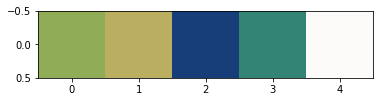

In [34]:
plt.imshow(im_row1)

The 1st pixel:

In [35]:
im_pixel_1st = img[0,0,:]
im_pixel_1st =im_pixel_1st.reshape(1,1,4)

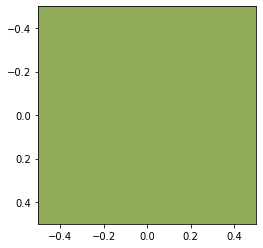

In [36]:
# pixel_1st = [[[50, 130, 121, 255]]]
plt.imshow(im_pixel_1st)

由以下三种颜色合成：

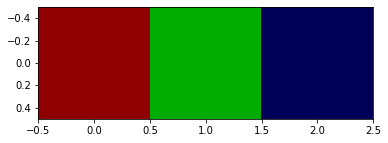

In [37]:
pixel_1st = [[[im_pixel_1st[0,0,0], 0, 0, 255],
      [0, im_pixel_1st[0,0,1],  0, 255],
      [0, 0, im_pixel_1st[0,0,2], 255],
      ]]
plt.imshow(pixel_1st)

In [38]:
print("The first pixel is made of RGB (R=",im_pixel_1st[0,0,0],", G=",im_pixel_1st[0,0,1],",", "B=",im_pixel_1st[0,0,2],").\n")

The first pixel is made of RGB (R= 145 , G= 172 , B= 86 ).



转换为16进制 (convert rgb to hex):

In [39]:
'#{:02x}{:02x}{:02x}'.format(im_pixel_1st[0,0,0], im_pixel_1st[0,0,1], im_pixel_1st[0,0,2] )
'#{:02x}{:02x}{:02x}'.format( 120, 0 , 255 )

'#7800ff'

## Remove Alpha Channel

In [40]:
im = np.array(Image.open('images/arr2img.png'))
# remove alpha
im_noalpha = np.delete(im, np.s_[3], axis=2) 
print(im_noalpha.shape)
# (4, 5 ,3)
# (height, width, 3)
print(im_noalpha)

(4, 5, 3)
[[[145 172  86]
  [186 175  96]
  [ 23  62 120]
  [ 51 132 117]
  [253 250 250]]

 [[ 21  56 120]
  [ 29  83 122]
  [188 170  98]
  [168 178  91]
  [192 163 101]]

 [[ 15  39 118]
  [  9  16 117]
  [242 224 223]
  [148 173  87]
  [ 14  34 118]]

 [[125 167  82]
  [148 173  87]
  [242 224 223]
  [131 169  84]
  [ 58 141  99]]]


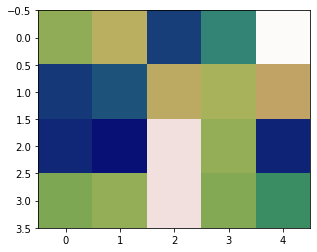

In [26]:
plt.imshow(im_noalpha)

# 其他模式

## CMYK

- C  cyan
- M  magetan
- Y  yellow
- K  black

加法颜色，打印机

![](images/rgb-vs-cmyk.png)

# HSV

HSV是把H（色相），S（饱和度），V（亮度）当做色值来定位颜色的空间。

色相的取回值范围是0-360度，用来表答示颜色的类别。其中红色是0度，绿色是120度，蓝色是240度。

饱和度的取值范围是0%~100%。用来表示颜色的鲜艳程度，灰色的饱和度是0%，纯粹的颜色（比如大红（255,0,0）青色（0,255,255）等等的饱和度是100%。

亮度的取值范围是0%-100%，用来表示颜色的明暗程度，亮度为0%时为黑色，亮度为100%时为白色，介于0%-100%之间时，则用来表示各个颜色的明暗程度。

![](images/HSV_color_solid_cylinder_saturation_gray.png)

In [45]:
import cv2
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv

array([[[ 81, 128, 172],
        [ 94, 123, 186],
        [ 12, 206, 120],
        [ 36, 156, 132],
        [120,   3, 253]],

       [[ 11, 210, 120],
        [ 17, 194, 122],
        [ 96, 122, 188],
        [ 87, 125, 178],
        [100, 121, 192]],

       [[  7, 223, 118],
        [  2, 235, 117],
        [118,  20, 242],
        [ 81, 127, 173],
        [  6, 225, 118]],

       [[ 75, 130, 167],
        [ 81, 127, 173],
        [118,  20, 242],
        [ 77, 128, 169],
        [ 45, 150, 141]]], dtype=uint8)

In [28]:
# %run hsv_picke2.py -f hsv -i pig.jpg

In [29]:
# %load hsv_picke2.py